In [19]:
%matplotlib inline 

from tobit import Tobit

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
### generate simulation data
n_points = 5000
n_features = 3
bias = 0.1 
weights = np.array([0.2, 0.4, 12.12])[:, np.newaxis]
sigma = 0.1

intercept = np.ones(n_points).reshape((-1,1))
low = -np.ones((n_points,n_features))
high = np.ones((n_points,n_features))
        
X = np.random.uniform(low=low, high=high)
        
# simulated noise
noise = np.random.normal(size=(n_points, 1))
        
# output    
Y = bias * intercept + np.dot(X, weights) + sigma * noise
Y = np.clip(Y, a_min=0, a_max=None, out=Y)

In [3]:
X_train= X[:3500]
Y_train = Y[:3500]
X_test = X[3500:]
Y_test = Y[3500:]

In [4]:
linear_regression = LinearRegression() 

In [5]:
%%time 
linear_regression.fit(X_train, Y_train)

CPU times: user 1.82 ms, sys: 0 ns, total: 1.82 ms
Wall time: 1.19 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
%%time 
tobit = Tobit(max_iter=30000)
history = tobit.fit(X_train, Y_train)

Convergence attained after 16168 epochs
CPU times: user 42.2 s, sys: 2.77 s, total: 44.9 s
Wall time: 27.4 s


In [7]:
history[:10]

[3.1009688,
 3.100786,
 3.1006038,
 3.100421,
 3.1002386,
 3.1000557,
 3.099873,
 3.0996902,
 3.0995076,
 3.0993254]

In [8]:
history[-10:]

[-0.43170968,
 -0.4317098,
 -0.4317099,
 -0.43171003,
 -0.4317101,
 -0.43171012,
 -0.43171024,
 -0.43171033,
 -0.43171054,
 -0.43171054]

In [9]:
tobit.sigma_()

0.09925226324796677

In [10]:
tobit.bias_()

0.10196843

In [11]:
tobit.weights_()

array([[ 0.20063119],
       [ 0.4056636 ],
       [12.115841  ]], dtype=float32)

In [12]:
y_pred_lr = linear_regression.predict(X_test)
y_pred_tobit = tobit.predict(X_test)

In [13]:
mean_squared_error(Y_test, y_pred_lr)

3.0603994723575862

In [14]:
mean_squared_error(Y_test, np.maximum(y_pred_lr, 0))

2.248739975955301

In [15]:
mean_squared_error(Y_test, y_pred_tobit)

0.005162783711719202

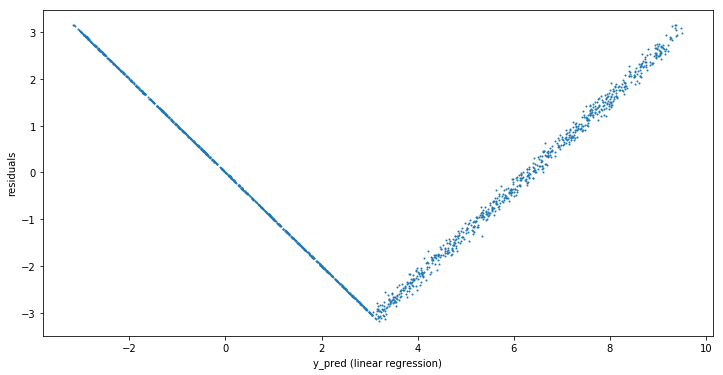

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_lr, Y_test - y_pred_lr, s=1)
plt.xlabel('y_pred (linear regression)')
plt.ylabel('residuals');

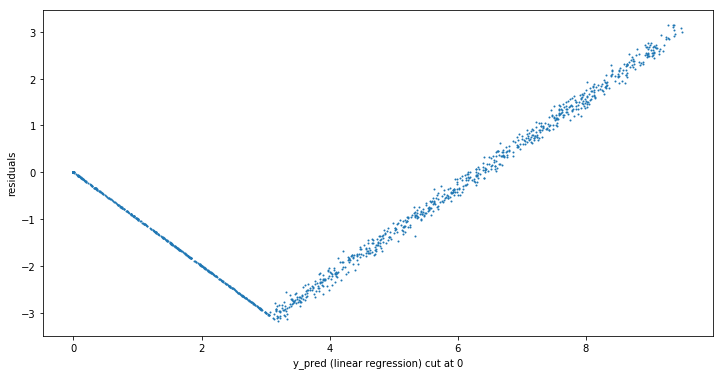

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(np.maximum(y_pred_lr, 0), Y_test - np.maximum(y_pred_lr, 0), s=1)
plt.xlabel('y_pred (linear regression) cut at 0')
plt.ylabel('residuals');

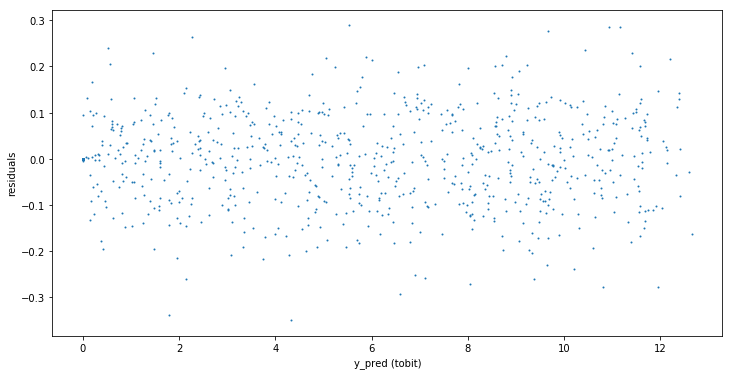

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_tobit, Y_test - y_pred_tobit, s=1)
plt.xlabel('y_pred (tobit)')
plt.ylabel('residuals');